# 10. Support Vector Machines, SVM
SVMs are versatile algorithms known for their ability to learn both linear and nonlinear class boundaries. In the field of classification, SVMs provide high accuracy and robustness. Linear SVMs excel in linear separability scenarios, while kernel methods enable SVMs to handle complex decision boundaries in nonlinear datasets.

## Overview
1. How SVM Work
    * 1.1 Types of SVM
        * 1.1.1 Linear SVM
        * 1.1.2 Non-linear SVM
    * 1.2 Popular kernel functions
    * 1.3 Terminology
2. Advantages and Disadvantages
3. Implementation example
    * 3.1. Classification example
    * 3.2. Regression example

## 1. How SVM Work

A Support Vector Machine (SVM) is a **supervised machine learning algorithm** used for both **classification and regression** tasks. While it can be applied to regression problems, SVM is **best suited for classification** tasks. The primary goal of the SVM algorithm is to identify the **optimal hyperplane in an N-dimensional space that can effectively separate data points into different classes** in the feature space.

The algorithm ensures that the margin between the closest points of different classes, known as **support vectors, is maximized**.

The **dimension of the hyperplane depends on the number of features**. For instance, if there are two input features, the hyperplane is simply a line, and if there are three input features, the hyperplane becomes a 2-D plane. As the number of features increases beyond three, the complexity of visualizing the hyperplane also increases.

<img src="https://www.researchgate.net/publication/362604337/figure/fig3/AS:11431281080636447@1661349098854/Support-Vector-Machine-SVM-based-classification.png" width="700">

One reasonable choice for the best hyperplane in a Support Vector Machine (SVM) is the one that maximizes the separation margin between the two classes.

### 1.1 Types of SVM

#### 1.1.1 Linear SVM
Linear SVMs use a linear decision boundary to separate the data points of different classes. This means that a single straight line (in 2D) or a hyperplane (in higher dimensions) can entirely divide the data points into their respective classes. A hyperplane that maximizes the margin between the classes is the decision boundary.

* Hard Margin SVM: when the **maximum-margin hyperplane** or **hard margin** exists. The hard margin is a plane selected based on maximizing the distance between the hyperplane and the nearest data point on each side.

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20201211181531/Capture.JPG" width="400">

* Soft Margin SVM: when the **maximum-margin hyperplane** does not exist. The soft margin is a plane selected based on maximizing the distance between the hyperplane and the nearest data point on each side, while also minimizing the number of misclassified data points (adds a penalty each time a point crosses the margin).

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20201211191138/Capture.JPG" width="400">

#### 1.1.2 Non-linear SVM
Non-Linear SVM can be used to classify data when it cannot be separated into two classes by a straight line (in the case of 2D). By using kernel functions, nonlinear SVMs can handle nonlinearly separable data. 

The original input data is transformed by these kernel functions into a higher-dimensional feature space, where the data points can be linearly separated.

Example of non-linear data:

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20201211183907/Capture.JPG" width="400">

We can use a kernel function to transform the data into a higher-dimensional space where it can be linearly separated:

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20201211185229/Capture.JPG" width="400">

### 1.2 Popular kernel functions
* **Linear Kernel:** K(x, b) = w^T x + b
* **Polynomial Kernel:** K(w, x) = (γ w^T x + b)^N
* **Radial Basis Function (RBF) Kernel:** K(w, x) = exp(-γ ||x_i - x_j||^n)
* **Sigmoid Kernel:** K(x_i, x_j) = tanh(α x_i^T x_j + b)

Visulizing the data is a good way to understand how SVM works and which kernel function is best suited for the data.

<img src="https://i.imgur.com/HKTLn35.png" width="800">`

### 1.2 Terminology
* **Hyperplane:** The hyperplane is the decision boundary used to separate data points of different classes in a feature space. For linear classification, this is a linear equation represented as wx+b=0.

* **Support Vectors:** Support vectors are the closest data points to the hyperplane. These points are critical in determining the hyperplane and the margin in Support Vector Machine (SVM).

* **Margin:** The margin refers to the distance between the support vector and the hyperplane. The primary goal of the SVM algorithm is to maximize this margin, as a wider margin typically results in better classification performance.
* **Kernel:** The kernel is a mathematical function used in SVM to map input data into a higher-dimensional feature space. This allows the SVM to find a hyperplane in cases where data points are not linearly separable in the original space. Common kernel functions include linear, polynomial, radial basis function (RBF), and sigmoid.

* **Hard Margin:** A hard margin refers to the maximum-margin hyperplane that perfectly separates the data points of different classes without any misclassifications.

* **Soft Margin:** When data contains outliers or is not perfectly separable, SVM uses the soft margin technique. This method introduces a slack variable for each data point to allow some misclassifications while balancing between maximizing the margin and minimizing violations.

* **C:** The C parameter in SVM is a regularization term that balances margin maximization and the penalty for misclassifications. A higher C value imposes a stricter penalty for margin violations, leading to a smaller margin but fewer misclassifications.

* **Hinge Loss:** The hinge loss is a common loss function in SVMs. It penalizes misclassified points or margin violations and is often combined with a regularization term in the objective function.

* **Dual Problem:** The dual problem in SVM involves solving for the **Lagrange multipliers** associated with the support vectors. This formulation allows for the use of the kernel trick and facilitates more efficient computation.

## 2. Advantages and Disadvantages

### Advantages
* **High-Dimensional Performance:** SVM excels in high-dimensional spaces, making it suitable for image classification and gene expression analysis.
* **Nonlinear Capability:** Utilizing kernel functions like RBF and polynomial, SVM effectively handles nonlinear relationships.
* **Outlier Resilience:** The soft margin feature allows SVM to ignore outliers, enhancing robustness in spam detection and anomaly detection.
* **Binary and Multiclass Support:** SVM is effective for both binary classification and multiclass classification, suitable for applications in text classification.
* **Memory Efficiency:** SVM focuses on support vectors, making it memory efficient compared to other algorithms.

### Disadvantages
* **Slow Training:** SVM can be slow for large datasets, affecting performance in SVM in data mining tasks.
* **Parameter Tuning Difficulty**: Selecting the right kernel and adjusting parameters like C requires careful tuning, impacting SVM algorithms.
* **Noise Sensitivity:** SVM struggles with noisy datasets and overlapping classes, limiting effectiveness in real-world scenarios.
* **Limited Interpretability:** The complexity of the hyperplane in higher dimensions makes SVM less interpretable than other models.
* **Feature Scaling Sensitivity:** Proper feature scaling is essential; otherwise, SVM models may perform poorly.

## 3. Implementation example

### 3.1. Classification example

We will use the `SVC` class from the `sklearn.svm` module to predict if cancer is Benign or malignant using historical data about patients diagnosed with cancer enables doctors to differentiate malignant cases and benign ones are given independent attributes.

In [ ]:
# Load the important packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC, SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_breast_cancer

# Load the datasets
cancer = load_breast_cancer()
X = cancer.data[:, :2]
y = cancer.target

cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

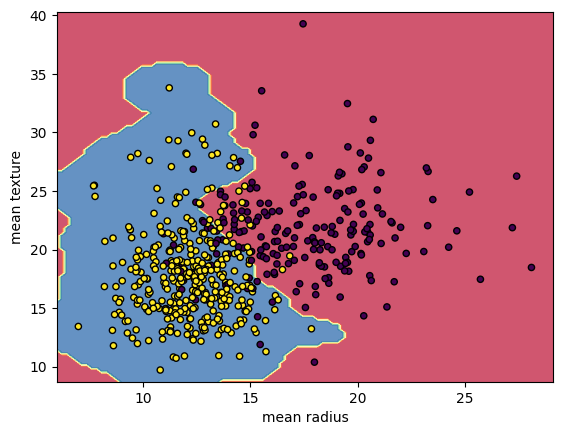

In [ ]:
# Build the model
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
# Trained the model
svm.fit(X, y)

# Plot Decision Boundary
DecisionBoundaryDisplay.from_estimator(
        svm,
        X,
        response_method="predict",
        cmap=plt.cm.Spectral,
        alpha=0.8,
        xlabel=cancer.feature_names[0],
        ylabel=cancer.feature_names[1],
    )

# Scatter plot
plt.scatter(X[:, 0], X[:, 1], 
            c=y, 
            s=20, edgecolors="k")
plt.show()

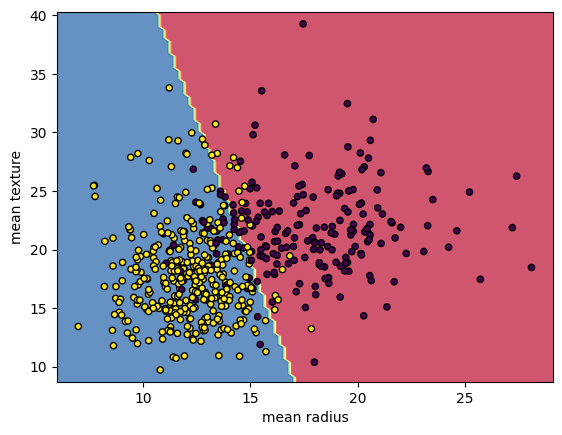

In [ ]:
# Build the model
svm = SVC(kernel="linear", gamma=0.5, C=1.0)
# Trained the model
svm.fit(X, y)

# Plot Decision Boundary
DecisionBoundaryDisplay.from_estimator(
        svm,
        X,
        response_method="predict",
        cmap=plt.cm.Spectral,
        alpha=0.8,
        xlabel=cancer.feature_names[0],
        ylabel=cancer.feature_names[1],
    )

# Scatter plot
plt.scatter(X[:, 0], X[:, 1], 
            c=y, 
            s=20, edgecolors="k")
plt.show()

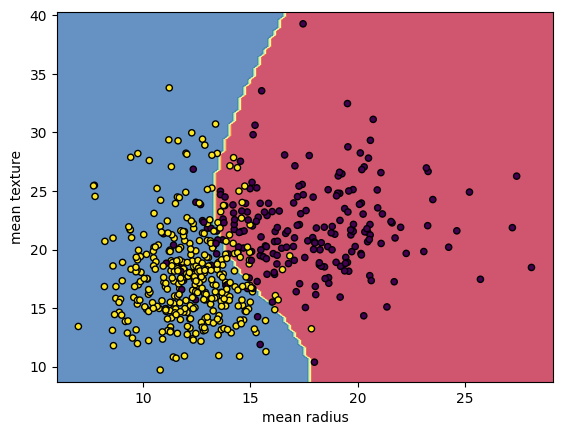

In [4]:
# Build the model
svm = SVC(kernel="poly", gamma=0.5, C=1.0)
# Trained the model
svm.fit(X, y)

# Plot Decision Boundary
DecisionBoundaryDisplay.from_estimator(
        svm,
        X,
        response_method="predict",
        cmap=plt.cm.Spectral,
        alpha=0.8,
        xlabel=cancer.feature_names[0],
        ylabel=cancer.feature_names[1],
    )

# Scatter plot
plt.scatter(X[:, 0], X[:, 1], 
            c=y, 
            s=20, edgecolors="k")
plt.show()

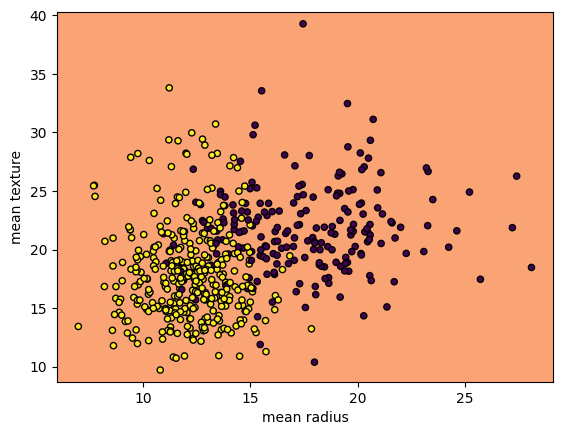

In [5]:
# Build the model
svm = SVC(kernel="sigmoid", gamma=0.5, C=1.0)
# Trained the model
svm.fit(X, y)

# Plot Decision Boundary
DecisionBoundaryDisplay.from_estimator(
        svm,
        X,
        response_method="predict",
        cmap=plt.cm.Spectral,
        alpha=0.8,
        xlabel=cancer.feature_names[0],
        ylabel=cancer.feature_names[1],
    )

# Scatter plot
plt.scatter(X[:, 0], X[:, 1], 
            c=y, 
            s=20, edgecolors="k")
plt.show()

### 3.2. Regression Example

SVR can be used for both linear and non-linear regression problems by using various kernel functions. 

In [7]:
df = pd.read_csv('../data\portuguese-school\student-mat.csv', sep=";")

# We will select a simplified version of the dataset
df = df[["freetime", "studytime", "G3"]]
df.columns = ["freetime", "studytime", "final_grade"]
df.head()

,freetime,studytime,final_grade
0,3,2,6
1,3,2,6
2,3,2,10
3,2,3,15
4,3,2,10


In [9]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

# train and test datasets are sorted for plotting purpose 
train = train.sort_values('studytime')
test = test.sort_values('studytime')

# We will use only one feature for training
X_train, X_test = train[['studytime']], test[['studytime']]
y_train, y_test = train['final_grade'], test['final_grade']

Since SVR is a distance-based algorithm, scaling is an important preprocessing step that can improve the accuracy and stability of the model.

In [10]:
# When using StandardScaler(), fit() method expects a 2D array-like input
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
svr_lin = SVR(kernel = 'linear')
svr_rbf = SVR(kernel = 'rbf')
svr_poly = SVR(kernel = 'poly')

svr_lin.fit(X_train_scaled, y_train)
svr_rbf.fit(X_train_scaled, y_train)
svr_poly.fit(X_train_scaled, y_train)

SVR(kernel='poly')

Evaluating model performance

In [ ]:
# Model prediction for train dataset ####
train['linear_svr_pred'] = svr_lin.predict(X_train_scaled)
train['rbf_svr_pred'] = svr_rbf.predict(X_train_scaled)
train['poly_svr_pred'] = svr_poly.predict(X_train_scaled)

print('Train dataset')
train.head()

Train dataset


,freetime,studytime,final_grade,linear_svr_pred,rbf_svr_pred,poly_svr_pred
102,3,1,14,10.1,10.859657,10.714748
208,3,1,10,10.1,10.859657,10.714748
128,3,1,0,10.1,10.859657,10.714748
144,4,1,0,10.1,10.859657,10.714748
156,2,1,13,10.1,10.859657,10.714748


Text(0, 0.5, 'final_grade')

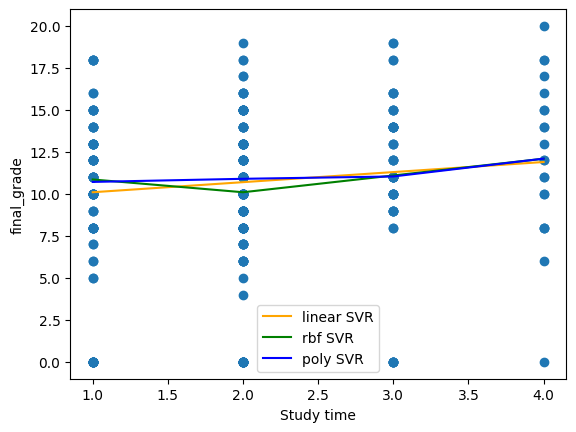

In [13]:
# Visualization
plt.scatter(train['studytime'], train['final_grade'])
plt.plot(train['studytime'], train['linear_svr_pred'], color = 'orange', label = 'linear SVR')
plt.plot(train['studytime'], train['rbf_svr_pred'], color = 'green', label = 'rbf SVR')
plt.plot(train['studytime'], train['poly_svr_pred'], color = 'blue', label = 'poly SVR')
plt.legend()
plt.xlabel('Study time')
plt.ylabel('final_grade')

In [14]:
# Test dataset - metrics
y_test_pred = svr_lin.predict(X_test_scaled)
r2_score = round(metrics.r2_score(y_test, y_test_pred),2)
rmse = round(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)),2)
print(f'r2: {r2_score}')
print(f'rmse: {rmse}')

r2: -0.03
rmse: 4.59


Text(0, 0.5, 'Actual')

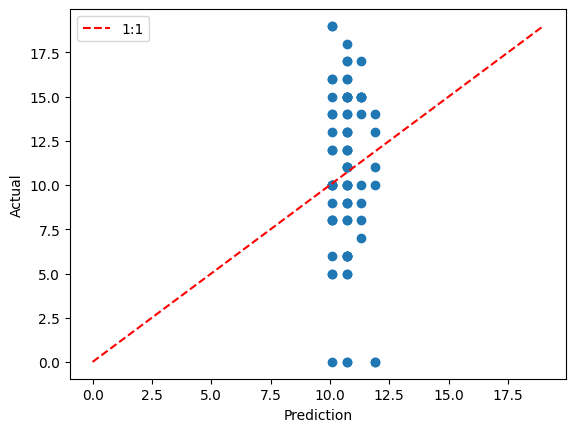

In [15]:
# Test dataset - plot
y_test_pred = svr_lin.predict(X_test_scaled)
min_x = min(min(y_test_pred), min(y_test))
max_x = max(max(y_test_pred), max(y_test))
plt.scatter(y_test_pred, y_test)
plt.plot([min_x,max_x], [min_x,max_x], 'r--', label = '1:1')
plt.legend()
plt.xlabel('Prediction')
plt.ylabel('Actual')